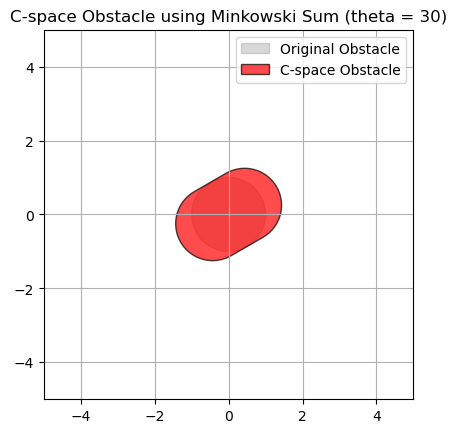

In [20]:
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString, Point
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def rotate_line_segment(angle_rad,length=1.0):
    """Rotate a line segment of given length by angle around origin"""
    x1, y1 = -length / 2, 0
    x2, y2 =  length / 2, 0
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                  [np.sin(angle_rad),  np.cos(angle_rad)]])
    p1 = R @ np.array([x1, y1])
    p2 = R @ np.array([x2, y2])
    return LineString([tuple(p1), tuple(p2)])

degree = 30
rad = degree * np.pi / 180
robot_line = rotate_line_segment(rad)

# Obstacle
obstacle_center = Point(0, 0)
obstacle_radius = 1

# Minkowski sum
cspace_obstacle = robot_line.buffer(obstacle_radius, cap_style=1)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

circle = plt.Circle((0, 0), obstacle_radius, color='gray', alpha=0.3, label='Original Obstacle')
ax.add_patch(circle)
x, y = cspace_obstacle.exterior.xy
ax.fill(x, y, alpha=0.7, fc='red', ec='black', label='C-space Obstacle')

plt.title("C-space Obstacle using Minkowski Sum (theta = 30)")
plt.legend()
plt.grid(True)
plt.savefig('cspace_30.png')
plt.show()



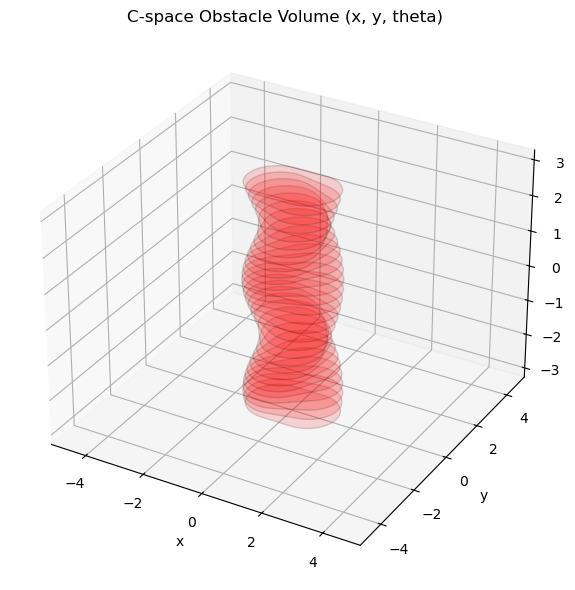

In [9]:

# Parameters
obstacle_radius = 1.0
line_length = 1.0
n_theta = 30
thetas = np.linspace(-np.pi, np.pi, n_theta)

def rotate_line_segment(length, angle_rad):
    """Rotate a line segment of given length by angle around origin"""
    x1, y1 = -length / 2, 0
    x2, y2 =  length / 2, 0
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                  [np.sin(angle_rad),  np.cos(angle_rad)]])
    p1 = R @ np.array([x1, y1])
    p2 = R @ np.array([x2, y2])
    return LineString([tuple(p1), tuple(p2)])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("theta")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-np.pi, np.pi)

for theta in thetas:
    # compute line segment under certain rotation
    line = rotate_line_segment(line_length, theta)

    # inflate circle
    cspace_slice = line.buffer(obstacle_radius, cap_style=1)
    x, y = cspace_slice.exterior.xy
    z = np.full_like(x, theta)
    verts = [list(zip(x, y, z))]
    poly = Poly3DCollection(verts, alpha=0.15, facecolor='red', edgecolor='k')
    ax.add_collection3d(poly)
plt.title("C-space Obstacle Volume (x, y, theta)")
plt.tight_layout()
plt.savefig('cspace.png')
plt.show()
